In [2]:
import json
import pandas as pd
import Levenshtein as lv
import os
# uncoment in case u want to save/load filesss
#import pickle
import matplotlib.pyplot as plt

In [3]:
def measure_time_distance(timedelta):
    """
    Function that convert timedelta into seconds
    """
    distance = (timedelta.total_seconds())
    return distance

def measure_text_distance(x,y):
    """
    Function that calculate the Levenshtein distance
    between two submissions code.
    https://en.wikipedia.org/wiki/Levenshtein_distance
    """
    return lv.distance(x,y)

def calculate_distribution(df, column_name, exercise, mean=True):
    """
    df: Dataframe with submissions
    column_name: column with status

    Function to obtain distribution of submissions status
    return metrics and amount of submissions
    """
    total_amount_submissions = df.shape[0]
    submissions_grouped = df.groupby([column_name]).size()
    metrics = {}
    if mean:
        metrics = submissions_grouped/total_amount_submissions
    else:
        metrics = submissions_grouped
    metrics['exercise'] = str(exercise)
    metrics['submission_amount'] = total_amount_submissions
    return metrics

def shift_columns(df, shift_exercise=False):
    """
    Function that create 4 new columns
    shifted column contains submissions_content shifted to calculate the distance
    datetime_shifted contains datetime shifted to calculate the distance between times
    
    distance, Levenshtein distance between submissions
    time_dist, time distance between submissions in seconds
    """
    df.loc[:,'shifted'] = df['content'].shift().fillna(value='')
    df.loc[:,'datetime_shifted'] = df['datetime'].shift().fillna(value=pd.Timestamp(1800, 1, 1, 0))
    df['distance'] = df.apply(lambda x : measure_text_distance(x['content'],x['shifted']), axis=1)
    df['time_dist'] = df.apply(lambda x : measure_time_distance(x['datetime']-x['datetime_shifted']), axis=1)
    if shift_exercise:
        df.loc[:,'exercise.name.previous'] = df['exercise.name'].shift().fillna(value='')
        df.loc[:,'submissions_status.previous'] = df['status'].shift().fillna(value='')
        df['switch_exercise'] = df.apply(lambda x : x['exercise.name'] != x['exercise.name.previous'], axis=1)
    return df

# Load IntroAlgo Submissions

In [4]:
submissions_introAlgo = pd.DataFrame()
dataset_home = "datasets/"
files = [
    #REPLACE THIS FILES TO ANALIZE ANOTHER DATASER
    #'2016-2c-introalgo-2c-2016.json', '2017-2c-introalgo-2c-2017.json',
    '2018-2c-introalgo-2018-2c-23Octubre.json',
]

for file in files:
    json_file = open(dataset_home+str(file), encoding='utf8')
    json_data = json.load(json_file)
    
    subm_df = pd.io.json.json_normalize(
        json_data, 'submissions', [['guide','slug'], ['student','email'],['student','social_id'],['guide','name'], ['exercise','name'],['exercise','eid'],['guide','language','name'], ['created_at']], record_prefix='submissions_', errors='ignore')
    subm_df['datetime'] = pd.to_datetime(subm_df['submissions_created_at'])
    submissions_introAlgo = submissions_introAlgo.append(subm_df)
    

In [5]:
submissions_introAlgo.rename(columns={'submissions_content':'content',
       'submissions_expectation_results': 'expectation_results', 'submissions_feedback':'feedback',
       'submissions_result' : 'result', 'submissions_sid' : 'sid', 'submissions_status': 'status',
       'submissions_submissions_count':'submissions_count', 'submissions_test_results':'test_results',
       'student.email' : 'submitter.email', 'student.social_id':'submitter.social_id'}, inplace=True)

In [6]:
submissions_introAlgo = submissions_introAlgo.reset_index()[['content', 'expectation_results', 'feedback',
       'result', 'sid', 'status', 'submissions_count', 'test_results',
       'guide.slug', 'submitter.email', 'submitter.social_id', 'guide.name',
       'exercise.name', 'exercise.eid', 'guide.language.name', 'datetime']]

In [7]:
submissions_introAlgo

,content,expectation_results,feedback,result,sid,status,submissions_count,test_results,guide.slug,submitter.email,submitter.social_id,guide.name,exercise.name,exercise.eid,guide.language.name,datetime
0,minimoEntre :: Int -> Int -> Int\r\nminimoEntr...,[],,\nsolucion.hs:27:25:\n parse error on input...,46fb6cbab2ed9e66,errored,0,[],introalgo-unc/mumuki-guia-funcional-funciones-...,alecabralhillar@gmail.com,auth0|5b72d07095a53a2866933530,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-09-14 01:26:54.586
1,minimoEntre :: Int -> Int -> Int\r\nminimoEntr...,[{'html': 'translation missing: es.expectation...,,\nsolucion.hs:25:21:\n Not in scope: ‘=<’\n...,e3cdb84007f23b35,errored,1,[],introalgo-unc/mumuki-guia-funcional-funciones-...,alecabralhillar@gmail.com,auth0|5b72d07095a53a2866933530,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-09-14 01:27:52.994
2,minimoEntre :: Int -> Int -> Int\r\nminimoEntr...,[{'html': 'translation missing: es.expectation...,,,d1304cd0063b1428,passed,2,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,alecabralhillar@gmail.com,auth0|5b72d07095a53a2866933530,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-09-14 01:28:17.048
3,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,82db831cbc839fe5,failed,0,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:29:32.237
4,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,31a049e62760504f,failed,1,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:30:15.843
5,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,4fec2baa12f2bb9f,failed,2,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:30:27.428
6,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,fd955d1ea85ccb63,failed,3,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:30:40.268
7,"minimoEntre (x,y) | x < y = x\r\n ...",[],,\nsolucion.hs:27:1:\n parse error (possibly...,907812721a962549,errored,4,[],introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:30:48.366
8,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,f0db9a080cb6f7f1,failed,5,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:31:14.448
9,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,bbcb56275717b389,failed,6,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:31:35.861


## Users logged in with social accounts.

In [11]:
submissions_df = submissions_introAlgo
social_accounts = submissions_df[submissions_df['submitter.email'].isnull()]['submitter.social_id'].nunique()
social_accounts

0

## Users logged in with email accounts.

In [16]:
email_accounts = submissions_df['submitter.email'].nunique()
email_accounts

79

In [25]:
exercises_social = 0
for social in submissions_df[submissions_df['submitter.email'].isnull()]['submitter.social_id'].unique():
    exercises_social += submissions_df[submissions_df['student.email'] == social]['exercise.name'].nunique()
exercises_social

0

In [17]:
exercises_email = 0
for email in submissions_df['submitter.email'].unique():
    exercises_email += submissions_df[submissions_df['submitter.email'] == email]['exercise.name'].nunique()

## aca recorto el dataset solo a los ejercicios que son de interes

In [18]:
submissions_df = submissions_df[submissions_df['guide.language.name'] == 'haskell']
submissions_df = submissions_df[~submissions_df['content'].isnull()]
submissions_df = submissions_df[~(submissions_df['status']=='aborted')]
exercises_names_2018 = ['Guardas: Básico', 'Otherwise', 'La historia sin fin',
       'No todo lo que brilla es Oro', 'Iterar', 'Variable Anónima',
       '¡Terminala! Parte 2', 'El caso base',
       'Pattern Matching con Tuplas', 'Orden de las Condiciones',
       'Cuando los patrones no encajan', 'esMultiploDeTres',
       'Pausa: Volvieron los tipos', 'esMultiploDe', 'Cubo',
       'Puntos Para Setenta!', 'Área', 'Tipando tuplas', 'esBisiesto',
       'celsiusToFahr', 'fahrToCelsius', 'haceFrioF', 'Los números',
       'fibonacci', 'pertenece', 'interseccion', 'transformadaLoca',
       'productoria', 'maximo', 'menoresA', 'diferencias', 'Dispersión',
       'sinRepetidos', 'Pinos', 'esCuadradoPerfecto', 'Días',
       'Valores y variables', 'siguiente', 'mitad', 'Inversa', 'Triple',
       'esNumeroPositivo', 'Más valores', 'Las Funciones',
       'elementos3-upla', 'aplicar2-upla', 'cuentaBizarra', 'notas',
       'notasFinales2-upla', 'esMayorDeEdad', 'calcular', 'Más funciones',
       'Los booleanos', 'Múltiples parámetros', 'Triángulos',
       'Combinando funciones', 'Composición', 'promedios',
       'promediosSinAplazos', 'Los operadores son funciones',
       'Más composición', 'alVesre', 'zipWith', 'filtrar', 'maximoSegun',
       'aplanar', 'intercalar']
#calculate_distribution()

In [19]:
submissions = pd.DataFrame()
for exercise_name in exercises_names_2018:
    submissions = submissions.append(submissions_df[submissions_df['exercise.name'] == exercise_name], ignore_index = True)

In [21]:
calculate_distribution(submissions, 'status', 'todos', False)

status
errored                  7511
failed                   7956
passed                   3345
passed_with_warnings      802
exercise                todos
submission_amount       19614
dtype: object

In [22]:
print("total users {}".format(social_accounts + email_accounts))

total users 79


In [26]:
submissions = submissions[~(submissions['status'] == 'aborted')]
submissions = submissions[~(submissions['status'] == 'pending')]
submissions = submissions[~(submissions['status'] == 'running')]
distribution = calculate_distribution(submissions, 'status', 'Exercises Distribution', False)
distribution

status
errored                                   7511
failed                                    7956
passed                                    3345
passed_with_warnings                       802
exercise                Exercises Distribution
submission_amount                        19614
dtype: object

In [27]:
submissions_df['exercise.name'].nunique()

91

# Calculo de uso de la plataforma

In [28]:
def calculate_day_and_hour_of_use(df):
    df['day_of_week'] = df['datetime'].apply(
        lambda x : x.isoweekday()
    )
    df['hour_of_day'] = df['datetime'].apply(
        lambda x : x.hour
    )
    return df

In [29]:
submissions = calculate_day_and_hour_of_use(submissions_df)
submissions

,content,expectation_results,feedback,result,sid,status,submissions_count,test_results,guide.slug,submitter.email,submitter.social_id,guide.name,exercise.name,exercise.eid,guide.language.name,datetime,day_of_week,hour_of_day
0,minimoEntre :: Int -> Int -> Int\r\nminimoEntr...,[],,\nsolucion.hs:27:25:\n parse error on input...,46fb6cbab2ed9e66,errored,0,[],introalgo-unc/mumuki-guia-funcional-funciones-...,alecabralhillar@gmail.com,auth0|5b72d07095a53a2866933530,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-09-14 01:26:54.586,5,1
1,minimoEntre :: Int -> Int -> Int\r\nminimoEntr...,[{'html': 'translation missing: es.expectation...,,\nsolucion.hs:25:21:\n Not in scope: ‘=<’\n...,e3cdb84007f23b35,errored,1,[],introalgo-unc/mumuki-guia-funcional-funciones-...,alecabralhillar@gmail.com,auth0|5b72d07095a53a2866933530,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-09-14 01:27:52.994,5,1
2,minimoEntre :: Int -> Int -> Int\r\nminimoEntr...,[{'html': 'translation missing: es.expectation...,,,d1304cd0063b1428,passed,2,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,alecabralhillar@gmail.com,auth0|5b72d07095a53a2866933530,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-09-14 01:28:17.048,5,1
3,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,82db831cbc839fe5,failed,0,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:29:32.237,4,23
4,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,31a049e62760504f,failed,1,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:30:15.843,4,23
5,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,4fec2baa12f2bb9f,failed,2,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:30:27.428,4,23
6,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,fd955d1ea85ccb63,failed,3,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:30:40.268,4,23
7,"minimoEntre (x,y) | x < y = x\r\n ...",[],,\nsolucion.hs:27:1:\n parse error (possibly...,907812721a962549,errored,4,[],introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:30:48.366,4,23
8,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,f0db9a080cb6f7f1,failed,5,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:31:14.448,4,23
9,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,bbcb56275717b389,failed,6,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:31:35.861,4,23


In [30]:
submissions_per_day = submissions[
    ['datetime', 'day_of_week']].groupby('day_of_week').count().reset_index().rename(columns={'datetime':'amount_submissions'})

## soluciones por dia 1 Lunes 7 Domingo

In [31]:
submissions_per_day['percentage'] = submissions_per_day['amount_submissions']/submissions_per_day['amount_submissions'].sum()*100
submissions_per_day

,day_of_week,amount_submissions,percentage
0,1,1504,7.622523
1,2,7236,36.673255
2,3,2374,12.031828
3,4,5416,27.449192
4,5,1121,5.681415
5,6,962,4.875577
6,7,1118,5.666211


## soluciones por franja horaria

In [34]:
submissions_per_hour = submissions[['hour_of_day', 'datetime']].groupby('hour_of_day').count()

In [35]:
submissions_per_hour.sum()

datetime    19731
dtype: int64

In [36]:
submissions_per_hour = submissions_per_hour.reset_index().rename(columns={'datetime':'amount_submissions'})
submissions_per_hour.sort_values('hour_of_day', inplace=True)
submissions_per_hour.set_index('hour_of_day')
submissions_per_hour

,hour_of_day,amount_submissions
0,0,1040
1,1,868
2,2,504
3,3,434
4,4,358
5,5,208
6,6,164
7,7,67
8,8,86
9,9,77


In [39]:
sub_0_3 = submissions_per_hour.loc[0:3,:]['amount_submissions'].sum()
sub_4_8 = submissions_per_hour.loc[4:8,:]['amount_submissions'].sum()
sub_9_13 = submissions_per_hour.loc[9:13,:]['amount_submissions'].sum()
sub_14_18 = submissions_per_hour.loc[14:18,:]['amount_submissions'].sum()
sub_19_23 = submissions_per_hour.loc[19:23,:]['amount_submissions'].sum()
lst_uso = [sub_0_3, sub_4_8, sub_9_13, sub_14_18, sub_19_23]
lst_uso

[2846, 883, 8638, 2414, 4950]

In [40]:
def plot_uso_por_horas(lst_uso):
    plt.gcf().clear()
    plt.style.use('seaborn')
    plt.figure(figsize=(15,10))
    plt.title("Intro Algo", size=30)
    plt.bar(
        ['0-3', '4-8', '9-13', '14-18', '19-23'],
        lst_uso, edgecolor='black', label='Cantidad de soluciones', width=0.5)
    plt.xlabel('Franja Horaria', size=24)
    #plt.ylabel('Cantidad de soluciones enviadas', size=24)
    plt.yticks(fontsize = 25)
    plt.xticks(fontsize = 25)
    plt.legend(loc=2, prop={'size': 20})
    plt.show()


In [41]:
def plot_uso_semanal(df):
    plt.gcf().clear()
    plt.style.use('seaborn')
    plt.figure(figsize=(15,10))
    plt.title("Intro Algo", size=30)
    plt.bar(
        ['L', 'M', 'X', 'J', 'V', 'S', 'D'],
        df['amount_submissions'], edgecolor='black', label='Cantidad de soluciones', width=0.5)
        #(df['amount_submissions']/df['amount_submissions'].sum())*100, edgecolor='black', label='Submissions Amount')
    plt.xlabel('Dia de la semana', size=24)
    #plt.ylabel('Cantidad de soluciones enviadas', size=24)
    plt.yticks(fontsize = 25)
    plt.xticks(fontsize = 25)
    plt.legend(loc=1, prop={'size': 20})
    plt.show()
    

<Figure size 432x288 with 0 Axes>

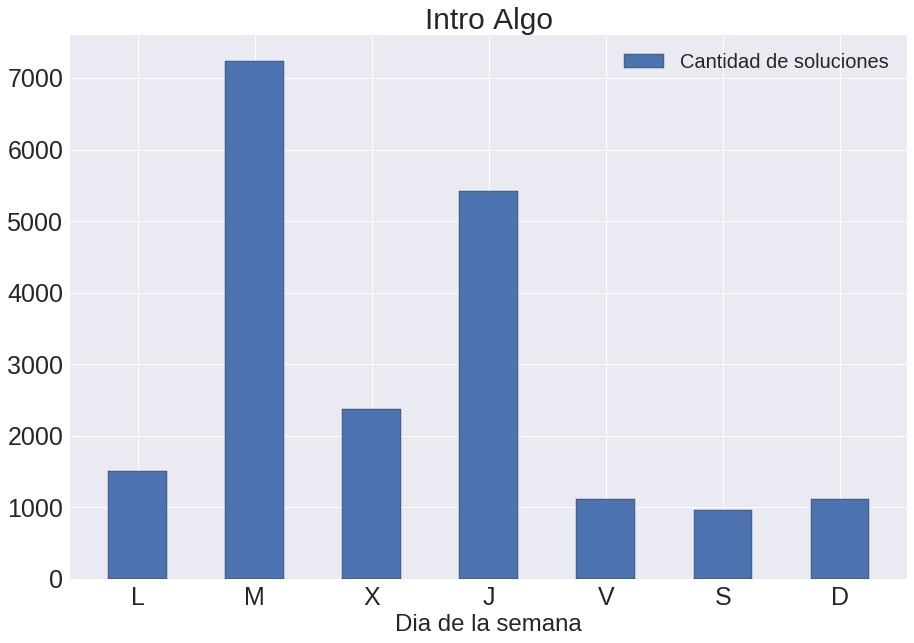

In [42]:
plot_uso_semanal(submissions_per_day)

<Figure size 576x396 with 0 Axes>

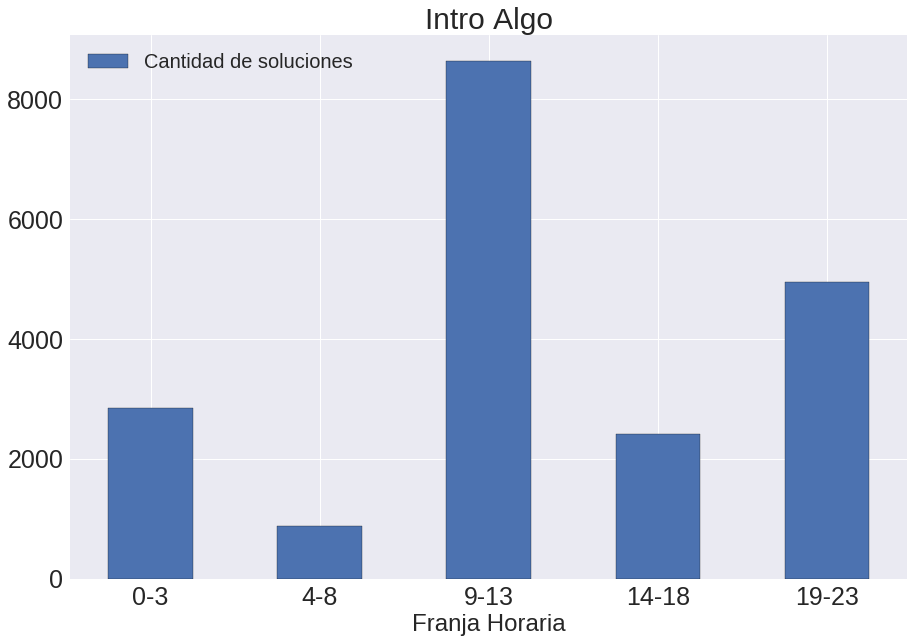

In [43]:
plot_uso_por_horas(lst_uso)